In [1]:

from itertools import cycle
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest,f_regression
import seaborn as sns
from scipy import stats
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest,f_regression
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import xgboost as xgb

C:\Users\hasso\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hasso\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\hasso\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
import glob
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn import preprocessing

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.applications.vgg16 import VGG16
#from keras.applications import 

In [4]:


import os
import seaborn as sns

import pandas as pd
import glob
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

#####  let's have a look how the distribution of the Training dataset looks like:
      *equals Distribution :75 images in each subclass

In [5]:
def data_train():
        path_train=glob.glob('BreakHis_100X/Train_100/*/*.png')
        
        data = pd.DataFrame(index=np.arange(0,len(path_train)), columns=['sublabel','path'])
        patient_id=[]
        sublabel=[]
        for i in range(len(path_train)):
                sublabel.append(path_train[i].split('\\')[1])
        data['path']=path_train
        data['sublabel']=sublabel
        return data

data_train=data_train()
print('Number of images in the training set is {}'.format(len(data_train)))

Number of images in the training set is 594


 Digramm shows the Distribution of  of 8 subclasses in the Training set

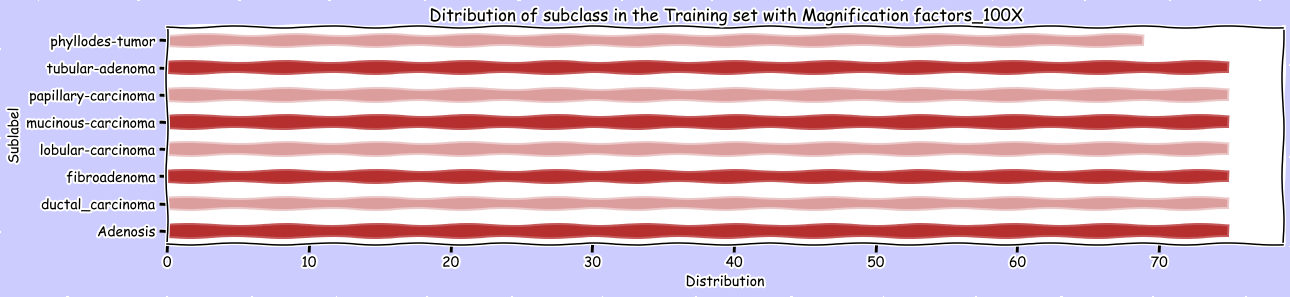

In [6]:
with plt.xkcd():
    plt.figure(figsize=(20,4),facecolor='#ccccff')
    data_train.sublabel.value_counts().plot(kind='barh',color=['#b22222c0','#b2222240'],label='female')
    plt.title('Ditribution of subclass in the Training set with Magnification factors_100X')
    plt.xlabel('Distribution')
    plt.ylabel('Sublabel')
    
    plt.show()

In [7]:
def data_test():
        path_valid = glob.glob('BreakHis_100X/Test_100/*/*.png', recursive=True)

        data = pd.DataFrame(index=np.arange(0, len(path_valid )), columns=['sublabel', 'path'])
        patient_id = []
        sublabel = []
        for i in range(len(path_valid )):
            sublabel.append(path_valid [i].split('\\')[1])
        data['path'] = path_valid
        data['sublabel'] = sublabel
        return data
data_test=data_test()
print('Number of images in the testing set is {}'.format(len(data_test)))

Number of images in the testing set is 322


 Digramm shows the Distribution of  of 8 subclasses in the Testing set

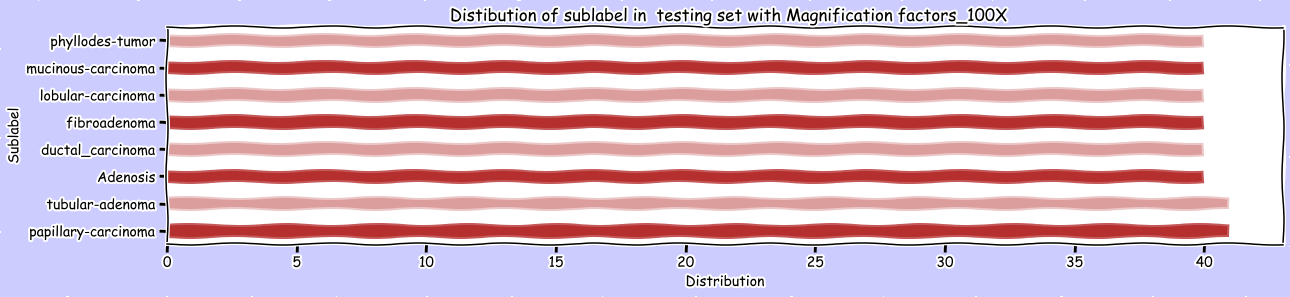

In [8]:
with plt.xkcd():
    plt.figure(figsize=(20,4),facecolor='#ccccff')
    data_test.sublabel.value_counts().plot(kind='barh',color=['#b22222c0','#b2222240'],label='female')
    plt.title(' Distibution of sublabel in  testing set with Magnification factors_100X')
    plt.xlabel('Distribution')
    plt.ylabel('Sublabel')
    
    plt.show()

In [9]:
def data_train():
    train_images=[]
    train_labels=[]
    SIZE=224
    i=0
    for directory_path in glob.glob("BreakHis_100X/Train_100/*"):
        label = directory_path.split('\\')[-1]
        for img_path  in glob.glob(os.path.join(directory_path,"*.png")):
            try:
                img = cv2.imread(img_path)       
                img = cv2.resize(img, (SIZE, SIZE))
                print(img_path)
                train_images.append(img)
                train_labels.append(label)
            except:
                break
    return train_images,train_labels
        
train_images,train_labels=data_train()

BreakHis_100X/Train_100\Adenosis\SOB_B_A-14-225496.png
BreakHis_100X/Train_100\Adenosis\SOB_B_A-14-22549AB-100-001.png
BreakHis_100X/Train_100\Adenosis\SOB_B_A-14-22549AB-100-002.png
BreakHis_100X/Train_100\Adenosis\SOB_B_A-14-22549AB-100-003.png
BreakHis_100X/Train_100\Adenosis\SOB_B_A-14-22549AB-100-004.png
BreakHis_100X/Train_100\Adenosis\SOB_B_A-14-22549AB-100-005.png
BreakHis_100X/Train_100\Adenosis\SOB_B_A-14-22549AB-100-006.png
BreakHis_100X/Train_100\Adenosis\SOB_B_A-14-22549AB-100-007.png
BreakHis_100X/Train_100\Adenosis\SOB_B_A-14-22549AB-100-008.png
BreakHis_100X/Train_100\Adenosis\SOB_B_A-14-22549AB-100-009.png
BreakHis_100X/Train_100\Adenosis\SOB_B_A-14-22549AB-100-010.png
BreakHis_100X/Train_100\Adenosis\SOB_B_A-14-22549AB-100-011.png
BreakHis_100X/Train_100\Adenosis\SOB_B_A-14-22549AB-100-012.png
BreakHis_100X/Train_100\Adenosis\SOB_B_A-14-22549AB-100-013.png
BreakHis_100X/Train_100\Adenosis\SOB_B_A-14-22549AB-100-014.png
BreakHis_100X/Train_100\Adenosis\SOB_B_A-14-22549

BreakHis_100X/Train_100\ductal_carcinoma\SOB_M_DC-14-2980-100-009.png
BreakHis_100X/Train_100\ductal_carcinoma\SOB_M_DC-14-2980-100-010.png
BreakHis_100X/Train_100\ductal_carcinoma\SOB_M_DC-14-2980-100-011.png
BreakHis_100X/Train_100\ductal_carcinoma\SOB_M_DC-14-2980-100-012.png
BreakHis_100X/Train_100\ductal_carcinoma\SOB_M_DC-14-2980-100-013.png
BreakHis_100X/Train_100\ductal_carcinoma\SOB_M_DC-14-2980-100-024.png
BreakHis_100X/Train_100\ductal_carcinoma\SOB_M_DC-14-2980-100-025.png
BreakHis_100X/Train_100\ductal_carcinoma\SOB_M_DC-14-2985-100-001.png
BreakHis_100X/Train_100\fibroadenoma\SOB_B_F-14-14134-100-001.png
BreakHis_100X/Train_100\fibroadenoma\SOB_B_F-14-14134-100-002.png
BreakHis_100X/Train_100\fibroadenoma\SOB_B_F-14-14134-100-003.png
BreakHis_100X/Train_100\fibroadenoma\SOB_B_F-14-14134-100-004.png
BreakHis_100X/Train_100\fibroadenoma\SOB_B_F-14-14134-100-005.png
BreakHis_100X/Train_100\fibroadenoma\SOB_B_F-14-14134-100-006.png
BreakHis_100X/Train_100\fibroadenoma\SOB_B_F

BreakHis_100X/Train_100\lobular-carcinoma\SOB_M_LC-14-13412-100-023.png
BreakHis_100X/Train_100\lobular-carcinoma\SOB_M_LC-14-13412-100-024.png
BreakHis_100X/Train_100\lobular-carcinoma\SOB_M_LC-14-13412-100-025.png
BreakHis_100X/Train_100\lobular-carcinoma\SOB_M_LC-14-13412-100-026.png
BreakHis_100X/Train_100\lobular-carcinoma\SOB_M_LC-14-13412-100-027.png
BreakHis_100X/Train_100\lobular-carcinoma\SOB_M_LC-14-13412-100-028.png
BreakHis_100X/Train_100\lobular-carcinoma\SOB_M_LC-14-13412-100-029.png
BreakHis_100X/Train_100\lobular-carcinoma\SOB_M_LC-14-13412-100-030.png
BreakHis_100X/Train_100\lobular-carcinoma\SOB_M_LC-14-13412-100-031.png
BreakHis_100X/Train_100\lobular-carcinoma\SOB_M_LC-14-13412-100-032.png
BreakHis_100X/Train_100\lobular-carcinoma\SOB_M_LC-14-13412-100-033.png
BreakHis_100X/Train_100\lobular-carcinoma\SOB_M_LC-14-15570-100-001.png
BreakHis_100X/Train_100\lobular-carcinoma\SOB_M_LC-14-15570-100-002.png
BreakHis_100X/Train_100\lobular-carcinoma\SOB_M_LC-14-15570-100-

BreakHis_100X/Train_100\papillary-carcinoma\SOB_M_PC-14-15687B-100-005.png
BreakHis_100X/Train_100\papillary-carcinoma\SOB_M_PC-14-15687B-100-006.png
BreakHis_100X/Train_100\papillary-carcinoma\SOB_M_PC-14-15687B-100-007.png
BreakHis_100X/Train_100\papillary-carcinoma\SOB_M_PC-14-15687B-100-008.png
BreakHis_100X/Train_100\papillary-carcinoma\SOB_M_PC-14-15687B-100-009.png
BreakHis_100X/Train_100\papillary-carcinoma\SOB_M_PC-14-15687B-100-010.png
BreakHis_100X/Train_100\papillary-carcinoma\SOB_M_PC-14-15687B-100-011.png
BreakHis_100X/Train_100\papillary-carcinoma\SOB_M_PC-14-15687B-100-012.png
BreakHis_100X/Train_100\papillary-carcinoma\SOB_M_PC-14-15687B-100-013.png
BreakHis_100X/Train_100\papillary-carcinoma\SOB_M_PC-14-15687B-100-014.png
BreakHis_100X/Train_100\papillary-carcinoma\SOB_M_PC-14-15687B-100-015.png
BreakHis_100X/Train_100\papillary-carcinoma\SOB_M_PC-14-15687B-100-016.png
BreakHis_100X/Train_100\papillary-carcinoma\SOB_M_PC-14-15704-100-001.png
BreakHis_100X/Train_100\pa

BreakHis_100X/Train_100\phyllodes-tumor\SOB_B_PT-14-22704-100-002.png
BreakHis_100X/Train_100\phyllodes-tumor\SOB_B_PT-14-22704-100-003.png
BreakHis_100X/Train_100\phyllodes-tumor\SOB_B_PT-14-22704-100-004.png
BreakHis_100X/Train_100\phyllodes-tumor\SOB_B_PT-14-22704-100-005.png
BreakHis_100X/Train_100\phyllodes-tumor\SOB_B_PT-14-22704-100-006.png
BreakHis_100X/Train_100\phyllodes-tumor\SOB_B_PT-14-29315EF-100-015.png
BreakHis_100X/Train_100\tubular-adenoma\SOB_B_TA-14-13200-100-001.png
BreakHis_100X/Train_100\tubular-adenoma\SOB_B_TA-14-13200-100-002.png
BreakHis_100X/Train_100\tubular-adenoma\SOB_B_TA-14-13200-100-003.png
BreakHis_100X/Train_100\tubular-adenoma\SOB_B_TA-14-13200-100-004.png
BreakHis_100X/Train_100\tubular-adenoma\SOB_B_TA-14-13200-100-005.png
BreakHis_100X/Train_100\tubular-adenoma\SOB_B_TA-14-13200-100-006.png
BreakHis_100X/Train_100\tubular-adenoma\SOB_B_TA-14-13200-100-007.png
BreakHis_100X/Train_100\tubular-adenoma\SOB_B_TA-14-13200-100-008.png
BreakHis_100X/Trai

In [10]:
def data_test():
    test_images=[]
    test_labels=[]
    SIZE=224
    for directory_path in glob.glob("BreakHis_100X/Test_100/*"):
        label = directory_path.split('\\')[-1]
        for img_path in glob.glob(os.path.join(directory_path,"*.png")):
            try:
                img = cv2.imread(img_path) 
                img = cv2.resize(img, (SIZE, SIZE))
                test_images.append(img)
                test_labels.append(label)
            except:
                break
    return test_images,test_labels
        
test_images,test_labels=data_test()
print(len(test_labels))

322


convert images un und sublabel into array:

In [11]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)





transform String labels into integers labels

In [12]:

#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)





In [13]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train=train_images
y_train=train_labels_encoded
x_test=test_images
y_test = test_labels_encoded



transform pixel in number between [0,1]

In [14]:
x_train, x_test = x_train / 255.0, x_test / 255.0


In [15]:
SIZE=224
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
xgb.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [17]:
feature_extractor=VGG_model.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_training = features

In [18]:
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)
X_for_test = X_test_features

In [155]:
model_xgboost = xgb.XGBClassifier(learning_rate=0.1,
                                      max_depth=5,
                                      n_estimators=5000,
                                      subsample=0.5,
                                      colsample_bytree=0.5,
                                      eval_metric='auc',
                                      verbosity=1)

eval_set = [(X_test_features , y_test)]

model_xgboost.fit(X_for_training,
                  y_train,
                  eval_metric="auc",
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True,
                 )


[0]	validation_0-auc:0.76491
[1]	validation_0-auc:0.84243
[2]	validation_0-auc:0.86887
[3]	validation_0-auc:0.88390
[4]	validation_0-auc:0.89003
[5]	validation_0-auc:0.89707
[6]	validation_0-auc:0.90534
[7]	validation_0-auc:0.91280
[8]	validation_0-auc:0.91516
[9]	validation_0-auc:0.91986
[10]	validation_0-auc:0.92201
[11]	validation_0-auc:0.92671
[12]	validation_0-auc:0.92759
[13]	validation_0-auc:0.93113
[14]	validation_0-auc:0.93237
[15]	validation_0-auc:0.93543
[16]	validation_0-auc:0.93790
[17]	validation_0-auc:0.93881
[18]	validation_0-auc:0.93996
[19]	validation_0-auc:0.94051
[20]	validation_0-auc:0.94113
[21]	validation_0-auc:0.94175
[22]	validation_0-auc:0.94217
[23]	validation_0-auc:0.94286
[24]	validation_0-auc:0.94304
[25]	validation_0-auc:0.94317
[26]	validation_0-auc:0.94305
[27]	validation_0-auc:0.94390
[28]	validation_0-auc:0.94440
[29]	validation_0-auc:0.94635
[30]	validation_0-auc:0.94632
[31]	validation_0-auc:0.94754
[32]	validation_0-auc:0.94913
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=1)

In [156]:
y_pred = model_xgboost.predict(X_test_features)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.64%


In [168]:
import sklearn.metrics as metrics
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

#Now predict using the trained RF model. 
prediction = model_xgboost.predict(X_test_features)
#Inverse le transform to get original label back. 
prediction = le.inverse_transform(prediction)

#Print overall accuracy
#from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction))

Accuracy =  0.7763975155279503


In [170]:
print(y_train)
print(model_xgboost.predict(X_for_training))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 

In [108]:
y_train_pred = model_xgboost.predict_proba(X_for_training)[:,]
y_valid_pred = model_xgboost.predict_proba(X_test_features)[:,]
#print(len(y_train))
#print(y_train_pred[1])
#print(y_train_pred)


print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred,multi_class="ovr"),
                                                    roc_auc_score(y_test, y_valid_pred,multi_class="ovr")))

AUC Train: 1.0000
AUC Valid: 0.9652


In [94]:
y_train_pred = model_xgboost.predict_proba(X_for_training)[:,1]
y_valid_pred = model_xgboost.predict_proba(X_test_features)[:,]

#print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred,multi_class="ovr"),
       #                                             roc_auc_score(y_test, y_valid_pred,multi_class="ovr")))
lli=y_train_pred
print(lli)

[2.35212129e-03 3.14851222e-03 2.79883319e-03 7.34877016e-04
 3.87596595e-03 1.33373193e-03 1.98083348e-03 2.75168312e-03
 6.83637522e-03 4.04816307e-03 1.84428354e-03 9.82587971e-03
 5.02582081e-03 8.04011361e-04 2.78389384e-03 4.72726626e-03
 1.31752028e-03 1.71783939e-03 3.02322162e-03 5.14150877e-03
 5.53728687e-03 4.99416841e-03 2.56354678e-02 1.97436684e-03
 2.76160799e-03 2.16105627e-03 1.71812740e-03 9.49111185e-04
 3.33870342e-03 1.77400594e-03 2.50990759e-03 1.61445874e-03
 2.46729539e-03 2.07105442e-03 2.38642213e-03 8.61099176e-03
 2.35212129e-03 8.93834606e-03 1.04088197e-03 1.37653691e-03
 1.43542921e-03 9.70174931e-03 1.62304973e-03 1.10590295e-03
 8.88332434e-04 3.38908430e-04 1.06877992e-02 1.14285480e-03
 1.18467282e-03 9.37390490e-04 3.87319573e-03 1.42324925e-03
 1.23495399e-03 2.85671954e-03 2.79988791e-03 1.93455408e-03
 2.58883694e-03 9.62499413e-04 9.28718888e-04 1.65978889e-03
 1.10590295e-03 3.54813016e-03 2.54225894e-03 2.16986937e-03
 7.25476653e-04 2.630903

In [40]:
#print(model_xgboost.predict_proba(X_for_training)[1][:])

In [ ]:
x=9.8078501e-01 7.3487702e-04 1.4255639e-03 2.6916596e-03 1.5519395e-03
 8.0478182e-03 1.3953311e-03 3.3678203e-03

In [3]:
learning_rate_list = [0.01,0.1]
max_depth_list = [3, 5]
n_estimators_list = [5000]

params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list}

num_combinations = 1
for v in params_dict.values(): num_combinations *= len(v) 

print('Number of Comobination :',num_combinations)
params_dict

Number of Comobination : 4


{'learning_rate': [0.01, 0.1], 'max_depth': [3, 5], 'n_estimators': [5000]}

In [141]:
x=model_xgboost.predict_proba(X_test_features)
print(x)
print(y_test)

[[9.85805333e-01 2.75168312e-03 7.95218162e-04 ... 6.30963768e-04
  1.77239708e-03 9.65885178e-04]
 [9.80692685e-01 6.83637522e-03 3.54355259e-04 ... 2.11816165e-03
  2.14429526e-03 6.51032198e-04]
 [9.68591750e-01 4.04816307e-03 4.30352380e-03 ... 4.59720520e-03
  7.38767628e-03 3.80190695e-03]
 ...
 [1.56634990e-02 4.48026927e-03 7.01769395e-03 ... 4.82839532e-03
  2.93801539e-03 9.28754985e-01]
 [1.63051356e-02 1.30379130e-03 1.53126696e-03 ... 4.32027597e-03
  8.44141585e-04 9.69585538e-01]
 [6.19842438e-03 8.04452319e-03 1.05578415e-02 ... 3.49462638e-03
  5.91584714e-03 9.54468489e-01]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [112]:
print(model_xgboost.predict_proba(X_for_training)[:,1])

[2.35212129e-03 3.14851222e-03 2.79883319e-03 7.34877016e-04
 3.87596595e-03 1.33373193e-03 1.98083348e-03 2.75168312e-03
 6.83637522e-03 4.04816307e-03 1.84428354e-03 9.82587971e-03
 5.02582081e-03 8.04011361e-04 2.78389384e-03 4.72726626e-03
 1.31752028e-03 1.71783939e-03 3.02322162e-03 5.14150877e-03
 5.53728687e-03 4.99416841e-03 2.56354678e-02 1.97436684e-03
 2.76160799e-03 2.16105627e-03 1.71812740e-03 9.49111185e-04
 3.33870342e-03 1.77400594e-03 2.50990759e-03 1.61445874e-03
 2.46729539e-03 2.07105442e-03 2.38642213e-03 8.61099176e-03
 2.35212129e-03 8.93834606e-03 1.04088197e-03 1.37653691e-03
 1.43542921e-03 9.70174931e-03 1.62304973e-03 1.10590295e-03
 8.88332434e-04 3.38908430e-04 1.06877992e-02 1.14285480e-03
 1.18467282e-03 9.37390490e-04 3.87319573e-03 1.42324925e-03
 1.23495399e-03 2.85671954e-03 2.79988791e-03 1.93455408e-03
 2.58883694e-03 9.62499413e-04 9.28718888e-04 1.65978889e-03
 1.10590295e-03 3.54813016e-03 2.54225894e-03 2.16986937e-03
 7.25476653e-04 2.630903

In [142]:
def my_roc_auc_score(model_xgboost, X_for_training, y_train):
    
    return roc_auc_score(y_train, model_xgboost.predict_proba(X_for_training)[:,],multi_class="ovr")

print(my_roc_auc_score(model_xgboost, X_for_training, y_train))

1.0


In [171]:


model_xgboost_hp = GridSearchCV(estimator=xgb.XGBClassifier(subsample=0.5,
                                                                colsample_bytree=0.25,
                                                                eval_metric='auc',
                                                                use_label_encoder=False),
                                param_grid=params_dict,
                                cv=2,
                                scoring=my_roc_auc_score,
                                return_train_score=True,
                                verbose=4)

model_xgboost_hp.fit(X_for_training, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END learning_rate=0.01, max_depth=3, n_estimators=5000;, score=(train=1.000, test=0.705) total time= 6.0min
[CV 2/2] END learning_rate=0.01, max_depth=3, n_estimators=5000;, score=(train=1.000, test=0.697) total time= 6.9min
[CV 1/2] END learning_rate=0.01, max_depth=5, n_estimators=5000;, score=(train=1.000, test=0.706) total time= 7.6min
[CV 2/2] END learning_rate=0.01, max_depth=5, n_estimators=5000;, score=(train=1.000, test=0.699) total time= 7.7min
[CV 1/2] END learning_rate=0.1, max_depth=3, n_estimators=5000;, score=(train=1.000, test=0.698) total time= 5.1min
[CV 2/2] END learning_rate=0.1, max_depth=3, n_estimators=5000;, score=(train=1.000, test=0.688) total time= 5.1min
[CV 1/2] END learning_rate=0.1, max_depth=5, n_estimators=5000;, score=(train=1.000, test=0.696) total time= 5.2min
[CV 2/2] END learning_rate=0.1, max_depth=5, n_estimators=5000;, score=(train=1.000, test=0.692) total time= 5.2min


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.25,
                                     enable_categorical=False,
                                     eval_metric='auc', gamma=None, gpu_id=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                    

In [174]:
df_cv_results = pd.DataFrame(model_xgboost_hp.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                               'param_learning_rate', 'param_max_depth', 'param_n_estimators']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators
1,1,0.702576,1.0,0.01,5,5000
0,2,0.701081,1.0,0.01,3,5000
3,3,0.693958,1.0,0.1,5,5000
2,4,0.693371,1.0,0.1,3,5000


Text(0.5, 1.0, 'Performance wrt # of Trees and Depth')

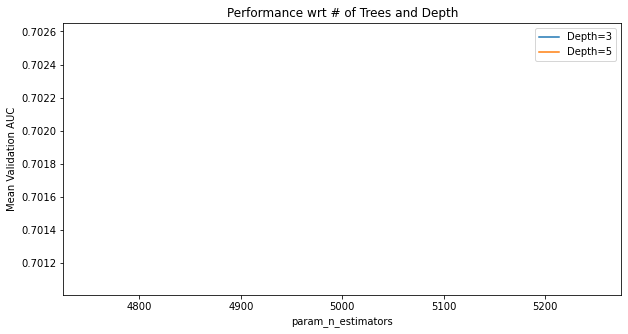

In [175]:
# First sort by number of estimators as that would be x-axis
df_cv_results.sort_values(by='param_n_estimators', inplace=True)

# Find values of AUC for learning rate of 0.05 and different values of depth
#lr_d2 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.01) & (df_cv_results['param_max_depth']==2),:]
lr_d3 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.01) & (df_cv_results['param_max_depth']==3),:]
lr_d5 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.01) & (df_cv_results['param_max_depth']==5),:]
#lr_d7 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.01) & (df_cv_results['param_max_depth']==7),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
#lr_d2.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)
lr_d3.plot(x='param_n_estimators', y='mean_test_score', label='Depth=3', ax=ax)
lr_d5.plot(x='param_n_estimators', y='mean_test_score', label='Depth=5', ax=ax)
#lr_d7.plot(x='param_n_estimators', y='mean_test_score', label='Depth=30', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt # of Trees and Depth')

Text(0.5, 1.0, 'Performance wrt learning rate')

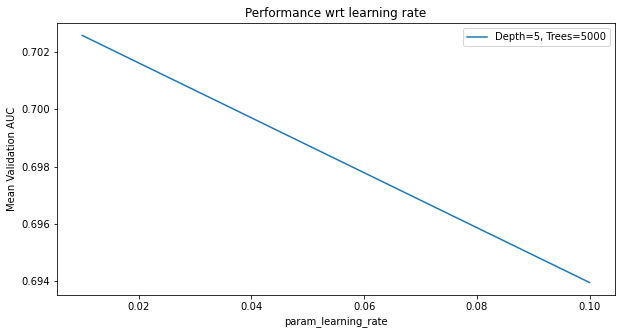

In [176]:
# First sort by learning rate as that would be x-axis
df_cv_results.sort_values(by='param_learning_rate', inplace=True)

# Find values of AUC for learning rate of 0.05 and different values of depth
lr_t3k_d2 = df_cv_results.loc[(df_cv_results['param_n_estimators']==5000) & (df_cv_results['param_max_depth']==5),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
lr_t3k_d2.plot(x='param_learning_rate', y='mean_test_score', label='Depth=5, Trees=5000', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt learning rate')

In [177]:

model_xgboost_fin = xgb.XGBClassifier(learning_rate=0.01,
                                          max_depth=5,
                                          n_estimators=5000,
                                          subsample=0.5,
                                          colsample_bytree=0.25,
                                          eval_metric='auc',
                                          verbosity=1,
                                          cv=3)

# Passing both training and validation dataset 
eval_set = [(X_for_training, y_train),(X_test_features, y_test)]

model_xgboost_fin.fit(X_for_training,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.87722	validation_1-auc:0.75733
[1]	validation_0-auc:0.94958	validation_1-auc:0.83460
[2]	validation_0-auc:0.97412	validation_1-auc:0.87021
[3]	validation_0-auc:0.98676	validation_1-auc:0.88811
[4]	validation_0-auc:0.99132	validation_1-auc:0.88780
[5]	validation_0-auc:0.99499	validation_1-auc:0.90152
[6]	validation_0-auc:0.99640	validation_1-auc:0.90077
[7]	validation_0-auc:0.99773	validation_1-auc:0.89856
[8]	validation_0-auc:0.99813	validation_1-auc:0.90577
[9]	validation_0-auc:0.99856	validation_1-auc:0.90538
[10]	validation_0-auc:0.99914	validation_1-auc:0.90390
[11]	validation_0-auc:0.99930	validation_1-auc:0.90757
[12]	validation_0-auc:0.99939	validation_1-auc:0.91091
[13]	validation_0-auc:0.99956	validation_1-auc:0.91283
[14]	validation_0-auc:0.99967	validation_1-auc:0.91633
[15]	validation_0-auc:0.99974	validation_1-auc:0.91389
[16]	validation_0-auc:0.99979	validation_1-auc:0.91173
[17]	validation_0-auc:0.99988	validation_1-auc:0.91088
[18]	validation_0-au

[149]	validation_0-auc:1.00000	validation_1-auc:0.95058
[150]	validation_0-auc:1.00000	validation_1-auc:0.95069
[151]	validation_0-auc:1.00000	validation_1-auc:0.95103
[152]	validation_0-auc:1.00000	validation_1-auc:0.95084
[153]	validation_0-auc:1.00000	validation_1-auc:0.95120
[154]	validation_0-auc:1.00000	validation_1-auc:0.95161
[155]	validation_0-auc:1.00000	validation_1-auc:0.95142
[156]	validation_0-auc:1.00000	validation_1-auc:0.95129
[157]	validation_0-auc:1.00000	validation_1-auc:0.95141
[158]	validation_0-auc:1.00000	validation_1-auc:0.95167
[159]	validation_0-auc:1.00000	validation_1-auc:0.95159
[160]	validation_0-auc:1.00000	validation_1-auc:0.95169
[161]	validation_0-auc:1.00000	validation_1-auc:0.95143
[162]	validation_0-auc:1.00000	validation_1-auc:0.95147
[163]	validation_0-auc:1.00000	validation_1-auc:0.95167
[164]	validation_0-auc:1.00000	validation_1-auc:0.95175
[165]	validation_0-auc:1.00000	validation_1-auc:0.95200
[166]	validation_0-auc:1.00000	validation_1-auc:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.25,
              enable_categorical=False, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

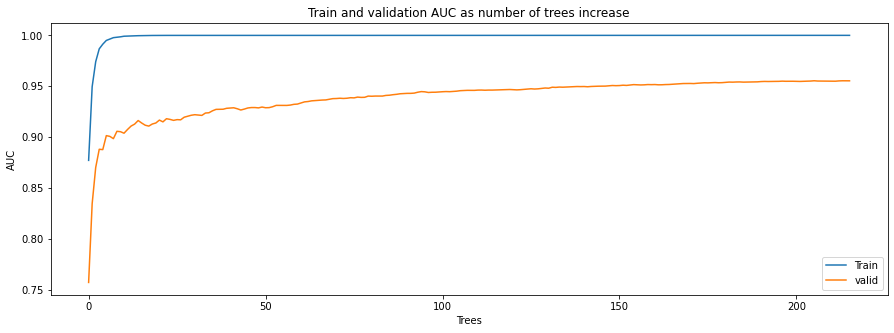

In [178]:
evaluation_results = model_xgboost_fin.evals_result()

# Index into each key to find AUC values for training and validation data after each tree
train_auc_tree = evaluation_results['validation_0']['auc']
valid_auc_tree = evaluation_results['validation_1']['auc']


# Plotting Section
plt.figure(figsize=(15,5))

plt.plot(train_auc_tree, label='Train')
plt.plot(valid_auc_tree, label='valid')

plt.title("Train and validation AUC as number of trees increase")
plt.xlabel("Trees")
plt.ylabel("AUC")
plt.legend(loc='lower right')
plt.show()

In [179]:
y_train_pred = model_xgboost_fin.predict_proba(X_for_training)
y_valid_pred = model_xgboost_fin.predict_proba(X_test_features)

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred,multi_class="ovr"),
                                                    roc_auc_score(y_test, y_valid_pred,multi_class="ovr")))

AUC Train: 1.0000
AUC Valid: 0.9553


In [ ]:
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [21]:
y_pred = model_xgboost_fin.predict(X_test_features)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(predictions)
prediction_0 = le.inverse_transform(predictions)
print(prediction_0)
print(test_labels)

Accuracy: 77.02%
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 3, 0, 5, 5, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 7, 6, 0, 2, 6, 2, 2, 6, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 4, 7, 3, 7, 0, 4, 7, 3, 7, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 5, 5, 0, 5, 1, 1, 4, 1, 1, 5, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 3, 2, 2, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 0, 3, 6, 0, 4, 3, 2, 3, 6, 3, 4, 6, 2, 3, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 7, 7, 7, 7, 7]
['Adenosis' 'Ade

[Text(0, 0.5, 'A'),
 Text(0, 1.5, 'DC'),
 Text(0, 2.5, 'FB'),
 Text(0, 3.5, 'LC'),
 Text(0, 4.5, 'MC'),
 Text(0, 5.5, 'PC'),
 Text(0, 6.5, 'PT'),
 Text(0, 7.5, 'TA')]

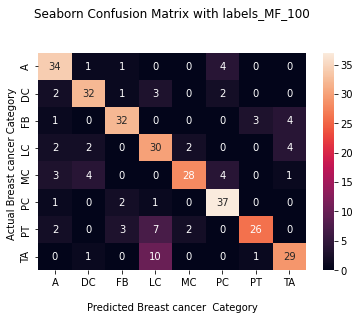

In [22]:
from sklearn.metrics import confusion_matrix
cm_grid = confusion_matrix(test_labels, prediction_0)
ax=sns.heatmap(cm_grid, annot=True)
ax.set_title('Seaborn Confusion Matrix with labels_MF_100\n\n');
ax.set_xlabel('\nPredicted Breast cancer  Category')
ax.set_ylabel('Actual Breast cancer Category ')
ax.xaxis.set_ticklabels(['A','DC','FB','LC','MC','PC','PT','TA'])
ax.yaxis.set_ticklabels(['A','DC','FB','LC','MC','PC','PT','TA'])


In [23]:
Tp_0=cm_grid[0,0]
Tp_1=cm_grid[1,1]
Tp_2=cm_grid[2,2]
Tp_3=cm_grid[3,3]
Tp_4=cm_grid[4,4]
Tp_5=cm_grid[5,5]
Tp_6=cm_grid[6,6]
Tp_7=cm_grid[7,7]

FN_0=cm_grid[0,1]+cm_grid[0,2]+cm_grid[0,3]+cm_grid[0,4]+cm_grid[0,5]+cm_grid[0,6]+cm_grid[0,7]
FN_1=cm_grid[1,0]+cm_grid[1,2]+cm_grid[1,3]+cm_grid[1,4]+cm_grid[1,5]+cm_grid[1,6]+cm_grid[1,7]
FN_2=cm_grid[2,0]+cm_grid[2,1]+cm_grid[2,3]+cm_grid[2,4]+cm_grid[2,5]+cm_grid[2,6]+cm_grid[2,7]
FN_3=cm_grid[3,0]+cm_grid[3,1]+cm_grid[3,2]+cm_grid[3,4]+cm_grid[3,5]+cm_grid[3,6]+cm_grid[3,7]
FN_4=cm_grid[4,0]+cm_grid[4,1]+cm_grid[4,2]+cm_grid[4,3]+cm_grid[4,5]+cm_grid[4,6]+cm_grid[4,7]
FN_5=cm_grid[5,0]+cm_grid[5,1]+cm_grid[5,2]+cm_grid[5,3]+cm_grid[5,4]+cm_grid[5,6]+cm_grid[5,7]
FN_6=cm_grid[6,0]+cm_grid[6,1]+cm_grid[6,2]+cm_grid[6,3]+cm_grid[6,4]+cm_grid[6,5]+cm_grid[6,7]
FN_7=cm_grid[7,0]+cm_grid[7,1]+cm_grid[7,2]+cm_grid[7,3]+cm_grid[7,4]+cm_grid[7,5]+cm_grid[7,6]



Fp_0=cm_grid[1,0]+cm_grid[2,0]+cm_grid[3,0]+cm_grid[4,0]+cm_grid[5,0]+cm_grid[6,0]+cm_grid[7,0]
Fp_1=cm_grid[0,1]+cm_grid[2,1]+cm_grid[3,1]+cm_grid[4,1]+cm_grid[5,1]+cm_grid[6,1]+cm_grid[7,1]
Fp_2=cm_grid[0,2]+cm_grid[1,2]+cm_grid[3,2]+cm_grid[4,2]+cm_grid[5,2]+cm_grid[6,2]+cm_grid[7,2]
Fp_3=cm_grid[0,3]+cm_grid[1,3]+cm_grid[2,3]+cm_grid[4,3]+cm_grid[5,3]+cm_grid[6,3]+cm_grid[7,3]
Fp_4=cm_grid[0,4]+cm_grid[1,4]+cm_grid[2,4]+cm_grid[3,4]+cm_grid[5,4]+cm_grid[6,4]+cm_grid[7,4]
Fp_5=cm_grid[0,5]+cm_grid[1,5]+cm_grid[2,5]+cm_grid[3,5]+cm_grid[4,5]+cm_grid[6,5]+cm_grid[7,5]
Fp_6=cm_grid[0,6]+cm_grid[1,6]+cm_grid[2,6]+cm_grid[3,6]+cm_grid[4,6]+cm_grid[5,6]+cm_grid[7,6]
Fp_7=cm_grid[0,7]+cm_grid[1,7]+cm_grid[2,7]+cm_grid[3,7]+cm_grid[4,7]+cm_grid[5,7]+cm_grid[6,7]

l=[]
for i in range(len(cm_grid)):
    for j in range(len(cm_grid)):
        l.append(cm_grid[i,j])
        
    
Tn_0=sum(l)-Tp_0-FN_0-Fp_0
Tn_1=sum(l)-Tp_1-FN_1-Fp_1
Tn_2=sum(l)-Tp_2-FN_2-Fp_2
Tn_3=sum(l)-Tp_3-FN_3-Fp_3
Tn_4=sum(l)-Tp_4-FN_4-Fp_4
Tn_5=sum(l)-Tp_5-FN_5-Fp_5
Tn_6=sum(l)-Tp_6-FN_6-Fp_6
Tn_7=sum(l)-Tp_7-FN_7-Fp_7

TP=[Tp_0,Tp_1,Tp_2,Tp_3,Tp_4,Tp_5,Tp_6,Tp_7]
FN=[FN_0,FN_1,FN_2,FN_3,FN_4,FN_5,FN_6,FN_7]
FP=[Fp_0,Fp_1,Fp_2,Fp_3,Fp_4,Fp_5,Fp_6,Fp_7]
TN=[Tn_0,Tn_1,Tn_1,Tn_2,Tn_3,Tn_4,Tn_6,Tn_7]

df=pd.DataFrame(index=np.arange(0,8),columns=['TP','FN','FP','TN'])
df['TP']=TP
df['FN']=FN
df['FP']=FP
df['TN']=TN
print(df)



df.rename(index={0:'A',1:'DC',2:'FB',3:'LC',4:'MC',5:'PC',6:'PT',7:'TA'},inplace=True)

df


   TP  FN  FP   TN
0  34   6  11  271
1  32   8   8  274
2  32   8   7  274
3  30  10  21  275
4  28  12   4  261
5  37   4  10  278
6  26  14   4  278
7  29  12   9  272


,TP,FN,FP,TN
A,34,6,11,271
DC,32,8,8,274
FB,32,8,7,274
LC,30,10,21,275
MC,28,12,4,261
PC,37,4,10,278
PT,26,14,4,278
TA,29,12,9,272


In [30]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
sublabel=['A','DC','FB','LC','MC','PC','PT','TA']
ds=['TP','FN','FP','TN']
colors = ["#c9d9d3", "#718dbf", "#e84d60",'#ffa180']

data = {'sublabel' : sublabel,
        'TP'   : [34,32,32,30,28,37,26,29],
        'FN'   : [6,8,8,10,12,4,14,12],
        'FP'   : [11,8,7,21,4,10,4,9],
        'TN'  :[271,274,274,275,261,278,278,272]  
       }
p = figure(x_range=sublabel, height=250, title="Number of TP,FN,FP,TN with Magnification factors 100X",
           toolbar_location=None, tools="hover", tooltips="$name @fruits: @$name")

p.vbar_stack(ds, x='sublabel', width=0.9, color=colors, source=data,
             legend_label=ds)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

In [402]:


'''proba =model.predict_proba(X_test_features)
predicted_class0=proba[:,0]
predicted_class1=proba[:,1]
predicted_class2=proba[:,2]
predicted_class3=proba[:,3]
predicted_class4=proba[:,4]
predicted_class5=proba[:,5]
predicted_class6=proba[:,6]
predicted_class7=proba[:,7]
print('  predicted probality for class 0 is : \n {}'.format(predicted_class0[:]))
print('  predicted probality for class 1 is : \n {}'.format(predicted_class1[:]))
print('  predicted probality for class 2 is : \n {}'.format(predicted_class2[:]))
print('  predicted probality for class 3 is : \n {}'.format(predicted_class3[:]))
print('  predicted probality for class 4 is : \n {}'.format(predicted_class4[:]))
print('  predicted probality for class 5 is : \n {}'.format(predicted_class5[:]))
print('  predicted probality for class 6 is : \n {}'.format(predicted_class6[:]))
print('  predicted probality for class 7 is : \n {}'.format(predicted_class7[:]))'''

"proba =model.predict_proba(X_test_features)\npredicted_class0=proba[:,0]\npredicted_class1=proba[:,1]\npredicted_class2=proba[:,2]\npredicted_class3=proba[:,3]\npredicted_class4=proba[:,4]\npredicted_class5=proba[:,5]\npredicted_class6=proba[:,6]\npredicted_class7=proba[:,7]\nprint('  predicted probality for class 0 is : \n {}'.format(predicted_class0[:]))\nprint('  predicted probality for class 1 is : \n {}'.format(predicted_class1[:]))\nprint('  predicted probality for class 2 is : \n {}'.format(predicted_class2[:]))\nprint('  predicted probality for class 3 is : \n {}'.format(predicted_class3[:]))\nprint('  predicted probality for class 4 is : \n {}'.format(predicted_class4[:]))\nprint('  predicted probality for class 5 is : \n {}'.format(predicted_class5[:]))\nprint('  predicted probality for class 6 is : \n {}'.format(predicted_class6[:]))\nprint('  predicted probality for class 7 is : \n {}'.format(predicted_class7[:]))"

In [24]:
from sklearn.metrics import classification_report
>>> target_names =['Adenosis', 'ductal_carcinoma','fibroadenoma','lobular_carcinoma','mucinous-carcinoma','papillary-carcinoma','phyllodes_tumor','tubular-adenoma']
>>> print(classification_report(y_test, predictions,target_names=target_names))

                     precision    recall  f1-score   support

           Adenosis       0.76      0.85      0.80        40
   ductal_carcinoma       0.80      0.80      0.80        40
       fibroadenoma       0.82      0.80      0.81        40
  lobular_carcinoma       0.59      0.75      0.66        40
 mucinous-carcinoma       0.88      0.70      0.78        40
papillary-carcinoma       0.79      0.90      0.84        41
    phyllodes_tumor       0.87      0.65      0.74        40
    tubular-adenoma       0.76      0.71      0.73        41

           accuracy                           0.77       322
          macro avg       0.78      0.77      0.77       322
       weighted avg       0.78      0.77      0.77       322



In [27]:
# importing pandas as pd
import pandas as pd
  
# import the StrinIO function
# from io module
from io import StringIO
  
# wrap the string data in StringIO function
StringData = StringIO("""subclass;precision;recall;f1-score
                            AD;0.76;0.85;0.80 
                            DC;0.80  ;    0.80 ;     0.80
                            FB;0.82    ;  0.80     ; 0.81
                            LC;0.59   ;   0.75  ;    0.66
                            MC;0.88  ;    0.70  ;    0.78
                            PC;0.79    ;  0.90   ;   0.84
                            PT;0.87 ;     0.65   ;   0.74 
                            TA ; 0.76   ;   0.71  ;    0.73""")
  
# let's read the data using the Pandas
# read_csv() function
df = pd.read_csv(StringData, sep =";")
  
# Print the dataframe

print(df)

df=df.set_index('subclass')
print(df)

                          subclass  precision  recall  f1-score
0                               AD       0.76    0.85      0.80
1                               DC       0.80    0.80      0.80
2                               FB       0.82    0.80      0.81
3                               LC       0.59    0.75      0.66
4                               MC       0.88    0.70      0.78
5                               PC       0.79    0.90      0.84
6                               PT       0.87    0.65      0.74
7                              TA        0.76    0.71      0.73
                                 precision  recall  f1-score
subclass                                                    
                            AD        0.76    0.85      0.80
                            DC        0.80    0.80      0.80
                            FB        0.82    0.80      0.81
                            LC        0.59    0.75      0.66
                            MC        0.88    0.70      0.

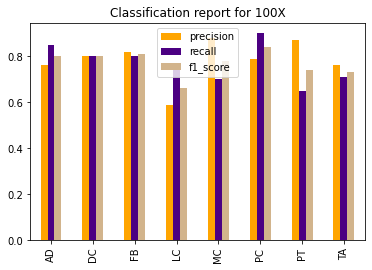

In [26]:
precision = [0.76,  0.80, 0.82, 0.59, 0.88, 0.79, 0.87,0.76]
recall = [0.85, 0.80,0.80,0.75, 0.70,0.90,0.65,0.71]
f1_score=[0.,0.64,0.73, 0.67, 0.85, 0.71, 0.73,0.87]
f1_score=[0.80,0.80,0.81, 0.66, 0.78, 0.84, 0.74,0.73]
index = ['AD','DC','FB','LC','MC','PC','PT','TA']
df = pd.DataFrame({'precision': precision,
                  'recall': recall,
                      'f1_score':f1_score}, index=index)
ax = df.plot.bar(color=['orange','indigo','tan'],title='Classification report for 100X')

In [1]:
df.sort_values('f1-score',inplace=True)

NameError: name 'df' is not defined

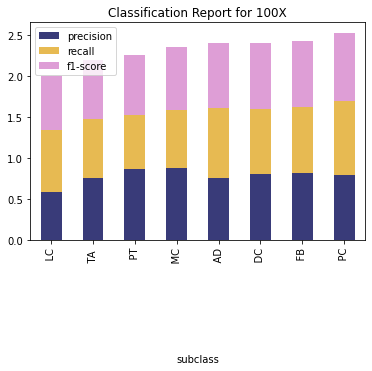

In [33]:
df.plot.bar(stacked=True,colormap='tab20b',title='Classification Report for 100X');